In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

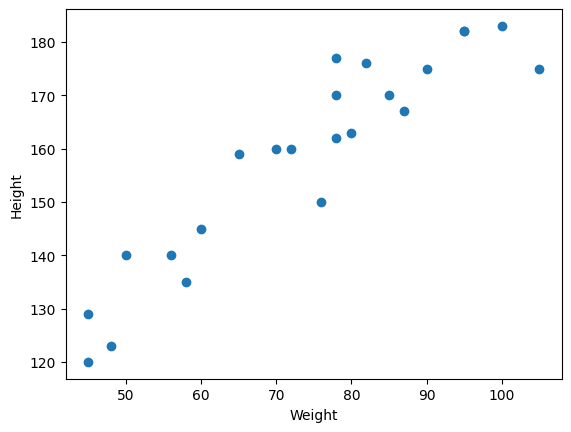

In [36]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

### Now as we see a linear relationship between datapoints we can think of linear regression and finding the best fit line

# Steps of building a ML project

## 1. Load the dataset
## 2. divide our dataset into independent and dependent features
## 3. Train test split of data
## 4. Standardize the data
## 5. Train the model
## 6. Calculating the performance metrics


In [37]:
# dividing dataset into dependent and independent features
X = df[["Weight"]] # -> give double brackets for conversion to 2-D 
y = df['Height']

In [38]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [39]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [40]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
X.shape , X_train.shape , X_test.shape

((23, 1), (18, 1), (5, 1))

In [42]:
# standardizing the dataset train independent features
# Why to standardize ? -> The features in the dataset may have different scales, which can negatively impact the performance of some machine learning algorithms. Standardization helps to bring all features to a similar scale. Ex: Here weight is in kg and height is in cm , standardization brings them to a common scale (mean=0, variance=1)
# Also finding the gradient descent value will be faster
# Also it is not necessary for all algorithms, but it's a good practice
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# We only perform transform using the same mean and std deviation from the training set , fit calculates that and transform applies it, so we onlt apply on test set

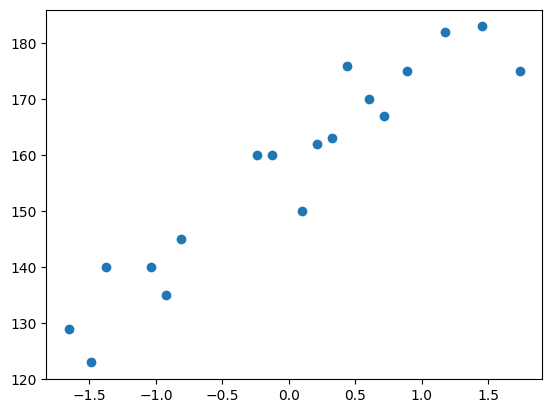

In [44]:
plt.scatter(X_train,y_train)

In [45]:
# Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
print("The slope or coefficient of weight is: " ,regressor.coef_)
print("Intercept of the model is: ",regressor.intercept_)

The slope or coefficient of weight is:  [17.03440872]
Intercept of the model is:  157.5


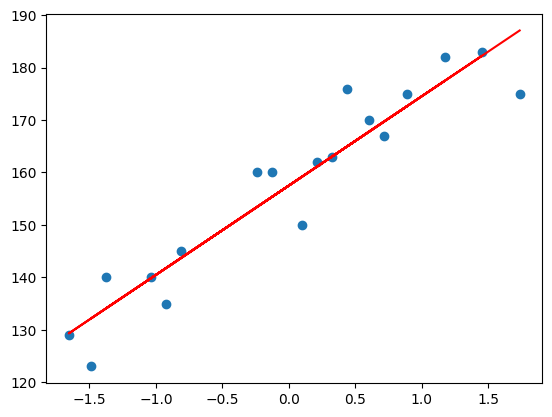

In [47]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), color='red') # undertstand this line , it means for our x_train datas predict the Y output based on our trained model

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [48]:
y_pred_test = regressor.predict(X_test)

In [49]:
y_pred_test , y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

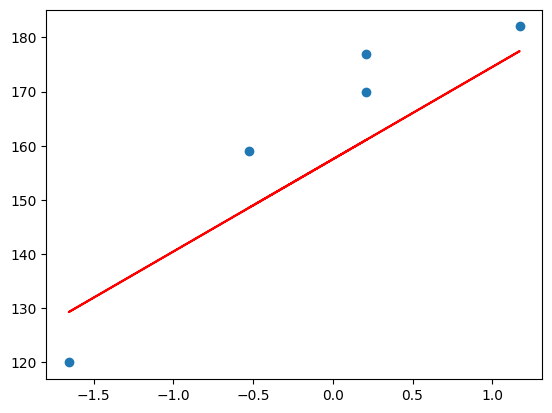

In [50]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test) , color = 'red')

In [52]:
# calculation performance metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
# The less the value of this is , the more better is the model


Mean Absolute Error:  9.822657814519232
Mean Squared Error:  109.77592599051664
Root Mean Squared Error:  10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [53]:
# If someone aasks for accuracy compute r2_score
score = r2_score(y_test, y_pred_test)

In [54]:
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables i.e features

In [56]:
# display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [57]:
# predicting for new data points
# new data point is weight = 80

# scale it first using same scaler
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [60]:
print("The height predicted for weight 80 is: ", regressor.predict(scaled_weight))

The height predicted for weight 80 is:  [163.01076266]


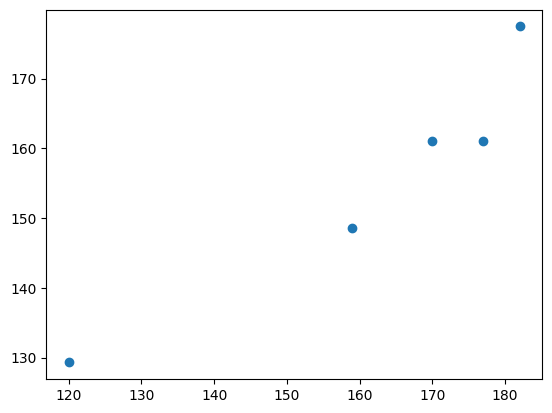

In [62]:
# Assumptions required to tell that the model is reallt performing well

# plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test) # This should show a linear relation

In [63]:
# Assumption 2 -> residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

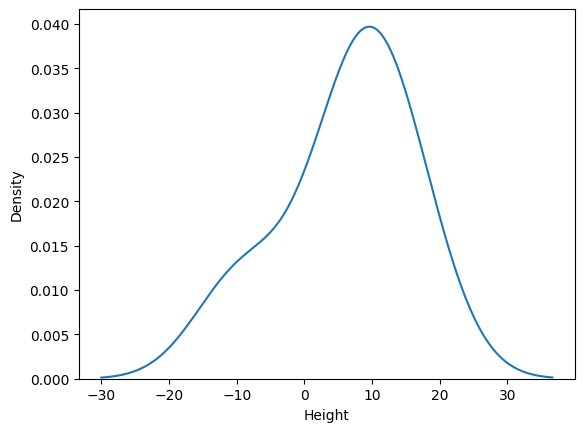

In [67]:
# plot the residuals
sns.kdeplot(residuals) # if it shows a normal distribution, it means our model is performing well

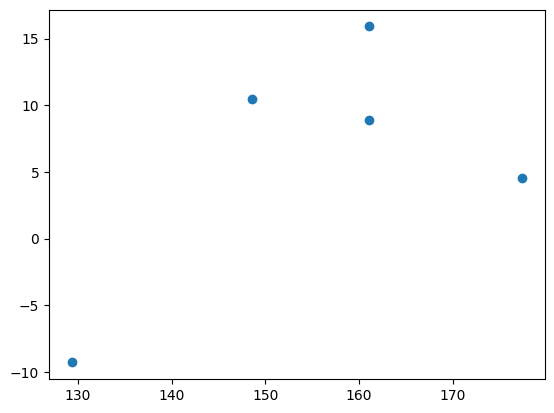

In [68]:
# Assumption 3 -> If we scatter plots with respect to prediction and residuals we should get a uniform distribution
plt.scatter(y_pred_test,residuals)